In [703]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
# Создаём сэмпл
n_samples = 500

age_owner = np.random.choice(90, n_samples) + 21
length = np.random.choice(120, n_samples) + 15
width = np.random.choice(80, n_samples) + 10

price = length * width * 100

data = pd.DataFrame({'age_owner': age_owner, 'length': length, 'width': width, 'price': price})
data.head(5)

,age_owner,length,width,price
0,84,86,26,223600
1,79,102,55,561000
2,61,50,26,130000
3,92,89,35,311500
4,24,23,22,50600


In [3]:
from sklearn.metrics import mean_absolute_error

X = data[['age_owner', 'length', 'width']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['age_owner', 'length', 'width']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [  42.31450626 5087.5079697  7628.26425767]
Bias: -398842.80358612054
Error: 62410.25186220825


In [4]:
X = data[['length', 'width']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['length', 'width']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [5087.07053681 7627.44458801]
Bias: -396028.3109080869
Error: 62504.45918422268


In [5]:
# Создаем новый признак
data['mult'] = data['length'] * data['width']
data.head(5)

,age_owner,length,width,price,mult
0,84,86,26,223600,2236
1,79,102,55,561000,5610
2,61,50,26,130000,1300
3,92,89,35,311500,3115
4,24,23,22,50600,506


In [6]:
X = data[['mult']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['mult']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [100.]
Bias: -1.7462298274040222e-10
Error: 9.094219421967864e-11


# HOMEWORK

Мне нужно придумать датасет, сгенерировать в него рандомные данные, при этом запланировать какие-то зависимости. Так же, какие-то столбцы данных должны быть лишними, портящими модель.

Так как много данных - это хорошо, то мой датасет будет состоять из 10 тысяч записей. Пусть это будут записи о посетителях контактного зоопарка, некоторые из которых были съедены тиграми (почему бы и нет).

Для этого я создам датафрейм, содержащий информацию о туристах:
- пол - f(emale)/m(ale);
- был ли он в том году на море - y/n;
- был ли съеден львом - y/n;
- цвет его обуви - black, red, green, white, orange;
- возраст - 3-90;
- вес - 10kg-150kg;
- рост - 50sm-220sm;
- счёт в банке - 1000\\$-1000000\\$;

Основная моя гипотеза вероятности поедания туриста тигром заключается в габаритах туриста, ведь можно предположить, что они казались более аппетитными для тигров и более достижимыми, т.к. медленнее бегают.

In [924]:
MALE = 'm'
FEMALE = 'f'
YES = 'y'
NO = 'n'

samples_count = 10000

# sex больше MALE
sex = [FEMALE if i > 1 else MALE for i in np.random.choice(3, samples_count)]

# prev_year_vac_sea больше NO
prev_year_vac_sea = [YES if i < 1 else NO for i in np.random.choice(5, samples_count)]

# is_dinner больше NO
is_dinner = [YES if i < 1 else NO for i in np.random.choice(50, samples_count)]

shoes_colors = ['black', 'red', 'green', 'white', 'orange']
shoes_color = [shoes_colors[i] for i in np.random.choice(5, samples_count)]

age = np.random.choice(88, samples_count) + 3
weight = np.random.choice(141, samples_count) + 10
height = np.random.choice(171, samples_count) + 50
bank_account = np.random.choice(999001, samples_count) + 1000

In [925]:
target_label = 'is_dinner'
labels = ['age', 'weight', 'height', 'sex', 'bank_account', 'shoes_color', 'prev_year_vac_sea']
all_labels = [*labels, target_label]
data = [age, weight, height, sex, bank_account, shoes_color, prev_year_vac_sea, is_dinner]

df = pd.DataFrame(
    data=dict(zip(all_labels, data)),
)

df.head()

,age,weight,height,sex,bank_account,shoes_color,prev_year_vac_sea,is_dinner
0,80,74,178,m,868868,green,n,n
1,10,30,122,f,18132,orange,y,n
2,41,33,171,f,785135,black,n,n
3,54,73,80,m,223219,white,n,y
4,16,62,59,f,228832,black,n,n


Так, у нас есть датасет для работы. В нём есть числовые и строковые значения столбцов. Я так сделал не случайно, это имитация грязных данных. Не хватает только отсутствующих значений или нулей. Это легко можно исправить)))

In [926]:
# чем выше grade, тем ниже вероятность поломки данных
def kill_data_cell(bad_data, grade: int):
    return lambda data: data if 1 < np.random.randint(0, grade) else bad_data

df['height'] = df['height'].apply(kill_data_cell(0, 1000))
df['height'] = df['height'].apply(kill_data_cell(np.nan, 1000))
df['sex'] = df['sex'].apply(kill_data_cell(np.nan, 1000))
df['bank_account'] = df['bank_account'].apply(kill_data_cell(10000000, 2000))
df['is_dinner'] = df['is_dinner'].apply(kill_data_cell(np.nan, 1000))

In [927]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
age                  10000 non-null int32
weight               10000 non-null int32
height               9978 non-null float64
sex                  9979 non-null object
bank_account         10000 non-null int64
shoes_color          10000 non-null object
prev_year_vac_sea    10000 non-null object
is_dinner            9986 non-null object
dtypes: float64(1), int32(2), int64(1), object(4)
memory usage: 547.0+ KB


Отлично! У нас есть данные, у нас есть "битые" данные, некоторые из них это nan. Сперва избавимся от них.

Как видно выше, nan объёкты у нас есть в нескольких колонках, а именно "heigth", "sex" и "is_dinner". Из этих колонок только "heigth" имеет числовой тип, поэтому nan значения в этой колонке можно заменить на среднее значение.

In [928]:
df.loc[df[df['height'].isna()].index, 'height'] = df['height'].mean()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
age                  10000 non-null int32
weight               10000 non-null int32
height               10000 non-null float64
sex                  9979 non-null object
bank_account         10000 non-null int64
shoes_color          10000 non-null object
prev_year_vac_sea    10000 non-null object
is_dinner            9986 non-null object
dtypes: float64(1), int32(2), int64(1), object(4)
memory usage: 547.0+ KB


Отлично! Мы избавились от nan значений в столбце "height". Теперь очередь за остальными столбцами.

Так как они имеют тип "object", с ними нужно разобраться поподробнее. Для этого я посмотрю, какими уникальными значениями они наполнены

In [929]:
sex_values = df['sex'].unique()
is_dinner_values = df['is_dinner'].unique()

print(f'Уникальные значения колонки "sex" - {sex_values}')
print(f'Уникальные значения колонки "is_dinner" - {is_dinner_values}')

Уникальные значения колонки "sex" - ['m' 'f' nan]
Уникальные значения колонки "is_dinner" - ['n' 'y' nan]


Как видно из результатов, колонка "sex" имеет категориальные значения, а колонка "is_dinner" - булевы признаки.

В лучшем случае, что я могу сделать, сохранив строки с битыми значениями - применить Indicator Method

In [930]:
sex_missing_label = 'sex_missing'
is_dinner_missing_label = 'is_dinner_missing'

df = df.assign(**{
    sex_missing_label: np.zeros(len(df)).astype('int'),
    is_dinner_missing_label: np.zeros(len(df)).astype('int'),
})

df.head()

,age,weight,height,sex,bank_account,shoes_color,prev_year_vac_sea,is_dinner,sex_missing,is_dinner_missing
0,80,74,178.0,m,868868,green,n,n,0,0
1,10,30,122.0,f,18132,orange,y,n,0,0
2,41,33,171.0,f,785135,black,n,n,0,0
3,54,73,80.0,m,223219,white,n,y,0,0
4,16,62,59.0,f,228832,black,n,n,0,0


In [931]:
sex_missing_indexes = df[df['sex'].isna()].index

df.loc[sex_missing_indexes, 'sex'] = 0
df.loc[sex_missing_indexes, sex_missing_label] = 1

In [932]:
is_dinner_missing_indexes = df[df['is_dinner'].isna()].index

df.loc[is_dinner_missing_indexes, 'is_dinner'] = 0
df.loc[is_dinner_missing_indexes, is_dinner_missing_label] = 1

In [933]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
age                  10000 non-null int32
weight               10000 non-null int32
height               10000 non-null float64
sex                  10000 non-null object
bank_account         10000 non-null int64
shoes_color          10000 non-null object
prev_year_vac_sea    10000 non-null object
is_dinner            10000 non-null object
sex_missing          10000 non-null int32
is_dinner_missing    10000 non-null int32
dtypes: float64(1), int32(4), int64(1), object(4)
memory usage: 625.1+ KB


Отлично! Теперь мы избавились от всех nan значений

Теперь моя задача - привести все данные к числовому типу. Для этого мне потребуется изучить все колонки с типом "object"

In [934]:
for col in df.select_dtypes(include=['object']).columns:
    print(f'Уникальные значения из колонки {col} - {df[col].unique()}')

Уникальные значения из колонки sex - ['m' 'f' 0]
Уникальные значения из колонки shoes_color - ['green' 'orange' 'black' 'white' 'red']
Уникальные значения из колонки prev_year_vac_sea - ['n' 'y']
Уникальные значения из колонки is_dinner - ['n' 'y' 0]


Как видно, есть категориальные значения: sex - ['f' 'm']; shoes_color - ['black' 'red' 'orange' 'green' 'white']; и булевы: prev_year_vac_sea - ['n' 'y'] и is_dinner - ['n' 'y'].

Каждый признак 'n' мы заменим на 0, 'y' на 1, 'f' на 0, 'm' на 1.

Каждый признак из shoes_color мы заменим на число от 1 до длины списка значений shoes_color

In [935]:
def change_y_n(val):
    if val == NO:
        return 0
    elif val == YES:
        return 1
    return val

df['prev_year_vac_sea'] = df['prev_year_vac_sea'].apply(change_y_n)
df['is_dinner'] = df['is_dinner'].apply(change_y_n)

df.head()

,age,weight,height,sex,bank_account,shoes_color,prev_year_vac_sea,is_dinner,sex_missing,is_dinner_missing
0,80,74,178.0,m,868868,green,0,0,0,0
1,10,30,122.0,f,18132,orange,1,0,0,0
2,41,33,171.0,f,785135,black,0,0,0,0
3,54,73,80.0,m,223219,white,0,1,0,0
4,16,62,59.0,f,228832,black,0,0,0,0


In [936]:
def change_shoes_color(val):
    try:
        return shoes_colors.index(val) + 1 # count from 1
    except:
        return -1
    return val

df['shoes_color'] = df['shoes_color'].apply(change_shoes_color)

df.head()

,age,weight,height,sex,bank_account,shoes_color,prev_year_vac_sea,is_dinner,sex_missing,is_dinner_missing
0,80,74,178.0,m,868868,3,0,0,0,0
1,10,30,122.0,f,18132,5,1,0,0,0
2,41,33,171.0,f,785135,1,0,0,0,0
3,54,73,80.0,m,223219,4,0,1,0,0
4,16,62,59.0,f,228832,1,0,0,0,0


In [937]:
def change_sex(val):
    if val == FEMALE:
        return 0
    elif val == MALE:
        return 1
    return val

df['sex'] = df['sex'].apply(change_sex)

df.head()

,age,weight,height,sex,bank_account,shoes_color,prev_year_vac_sea,is_dinner,sex_missing,is_dinner_missing
0,80,74,178.0,1,868868,3,0,0,0,0
1,10,30,122.0,0,18132,5,1,0,0,0
2,41,33,171.0,0,785135,1,0,0,0,0
3,54,73,80.0,1,223219,4,0,1,0,0
4,16,62,59.0,0,228832,1,0,0,0,0


In [938]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
age                  10000 non-null int32
weight               10000 non-null int32
height               10000 non-null float64
sex                  10000 non-null int64
bank_account         10000 non-null int64
shoes_color          10000 non-null int64
prev_year_vac_sea    10000 non-null int64
is_dinner            10000 non-null int64
sex_missing          10000 non-null int32
is_dinner_missing    10000 non-null int32
dtypes: float64(1), int32(4), int64(5)
memory usage: 625.1 KB


Отлично! Все наши значения non-null и приведены к числовому виду

Теперь было бы здорово проверить наши данные на наличие выбросов. Т.к. более наглядных инструментов, кроме графиков, я пока не знаю, я применю точечный график к каждому столбцу

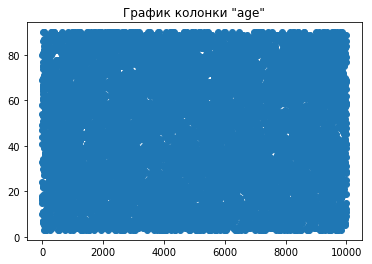

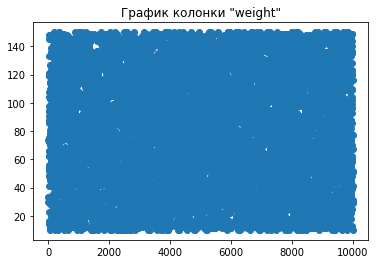

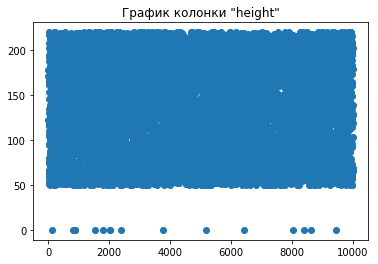

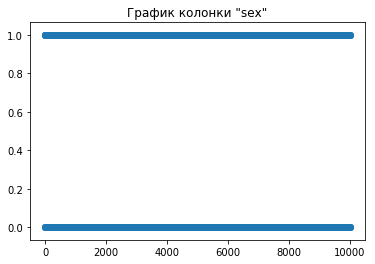

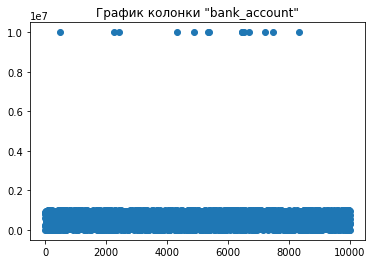

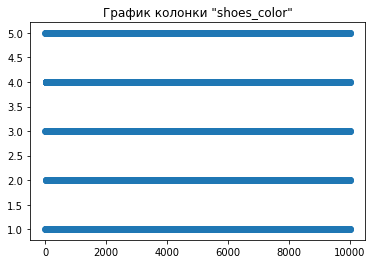

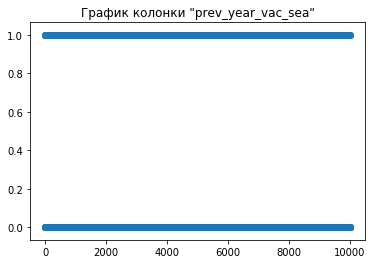

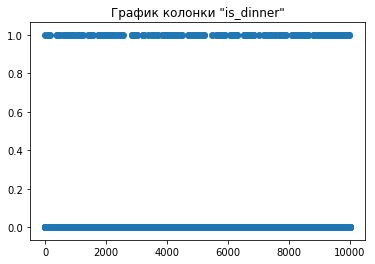

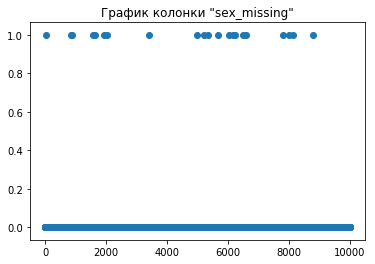

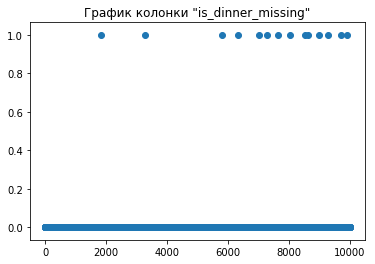

In [939]:
x = range(len(df))

for col in df.columns:
    plt.title(f'График колонки "{col}"')
    plt.scatter(x, df[col])
    plt.show()

Очевидные выбросы есть в колонках: "height" (< 50), "bank_account" (> 1mln). Остальные выглядят в норме, поэтому займёмся именно этими рядами

In [942]:
df[df['height'] < 50].head()

,age,weight,height,sex,bank_account,shoes_color,prev_year_vac_sea,is_dinner,sex_missing,is_dinner_missing
105,37,16,0.0,1,372141,5,0,0,0,0
821,15,82,0.0,1,621547,3,0,0,0,0
875,53,124,0.0,0,172364,4,0,0,0,0
881,25,143,0.0,1,855902,3,0,1,0,0
1538,53,18,0.0,1,254170,4,1,0,0,0


Да, опеределенно их можно заменить на среднее значение

In [950]:
df.loc[df[df['height'] < 50].index, 'height'] = df['height'].mean()

df[df['height'] < 50].shape

(0, 10)

Повторим фокус с столбцом "bank_account"

In [952]:
df[df['bank_account'] > 1000000].head()

,age,weight,height,sex,bank_account,shoes_color,prev_year_vac_sea,is_dinner,sex_missing,is_dinner_missing
498,25,149,69.0,1,10000000,4,0,0,0,0
2258,56,92,179.0,0,10000000,1,0,0,0,0
2415,64,94,76.0,1,10000000,2,0,0,0,0
4319,12,43,125.0,0,10000000,1,1,0,0,0
4897,46,141,108.0,1,10000000,5,0,0,0,0


In [954]:
df.loc[df[df['bank_account'] < 50].index, 'bank_account'] = df['bank_account'].mean()

df[df['bank_account'] < 50].shape

(0, 10)

Отлично! Теперь я избавился от всех выбросов, пустых значений и привёл все строковые значения к числовым

Теперь можно сделать какую-то магию и начать производить вычисления

In [962]:
x = df[[*labels, 'sex_missing', 'is_dinner_missing']]
y = df[target_label]

In [963]:
model = LinearRegression().fit(x, y)
print(f'Weights: {model.coef_}')
print(f'Bias: {model.intercept_}')

pred_values = model.predict(x)
print(f'Error: {mean_absolute_error(pred_values, y)}')

Weights: [-1.80623039e-05  1.56861126e-05  8.37007386e-06  3.03376708e-03
 -9.00571787e-10  3.70107675e-04  4.06073251e-03  7.54123939e-02
 -2.15986833e-02]
Bias: 0.01667566052024042
Error: 0.04261633985841016


Средняя абсолютная ошибка получилась очень маленькая (~4.2%), но это связано с тем, что целевое значение имеет булев тип. Попробуем его отпимизировать, удалив лишние пункты. Начнём, пожалуй, с пунктов: "bank_account", "prev_year_vac_sea"

In [964]:
x = df[['age', 'weight', 'height', 'sex', 'shoes_color', 'sex_missing', 'is_dinner_missing']]
y = df[target_label]

In [965]:
model = LinearRegression().fit(x, y)
print(f'Weights: {model.coef_}')
print(f'Bias: {model.intercept_}')

pred_values = model.predict(x)
print(f'Error: {mean_absolute_error(pred_values, y)}')

Weights: [-1.90489047e-05  1.58483607e-05  8.60232449e-06  2.97266272e-03
  3.65442729e-04  7.52812986e-02 -2.21631993e-02]
Bias: 0.01706497947784183
Error: 0.0426218983315395


Данные изменились. Попробуем избавиться от ещё нескольких колонок, не влияющих на габариты туриста: "age", "sex", "sex_missing", "shoes_color"

In [969]:
x = df[['weight', 'height','is_dinner_missing']]
y = df[target_label]

In [970]:
model = LinearRegression().fit(x, y)
print(f'Weights: {model.coef_}')
print(f'Bias: {model.intercept_}')

pred_values = model.predict(x)
print(f'Error: {mean_absolute_error(pred_values, y)}')

Weights: [ 1.66911999e-05  8.76330867e-06 -2.21770820e-02]
Bias: 0.019309735405023773
Error: 0.04264792929994754


Теперь можно из двух колонок "weight" и "height" сделать одну - индекс массы тела, и на основе него расчитать среднюю ошибку

In [973]:
df['body_index'] = df['weight'] / pow(df['height'] / 100, 2)

In [977]:
x = df[['body_index']]
y = df[target_label]

In [978]:
model = LinearRegression().fit(x, y)
print(f'Weights: {model.coef_}')
print(f'Bias: {model.intercept_}')

pred_values = model.predict(x)
print(f'Error: {mean_absolute_error(pred_values, y)}')

Weights: [-3.41199169e-06]
Bias: 0.022046712076703223
Error: 0.04264934854955377


Вывод: ну шуточных данных изменения по средней ошибке не так сильно стали отличаться в подготовленных данных от полных, но после обработки мы можем провести сразу несколько разных исследований и проверить большее количество гипотез, чем раньше.

Очень сильно помогает при подготовке датасета метод замены пустых данных и булевых/категориальных, чего не хватало на курсе по мат статистике.

Я уверен, что в реальных датасетах с более-менее настоящими данными результат будет наиболее достоверный.